In [21]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
  
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

import missingno as msno
%matplotlib inline
from IPython.display import display
#import hvplot.pandas

In [22]:
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv('separated_data_train.csv') 
      
    # Printing the dataswet shape 
    #print ("Dataset Lenght: ", len(balance_data)) 
    #print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    #display(balance_data.head()) 
    return balance_data 


In [23]:
train = importdata()

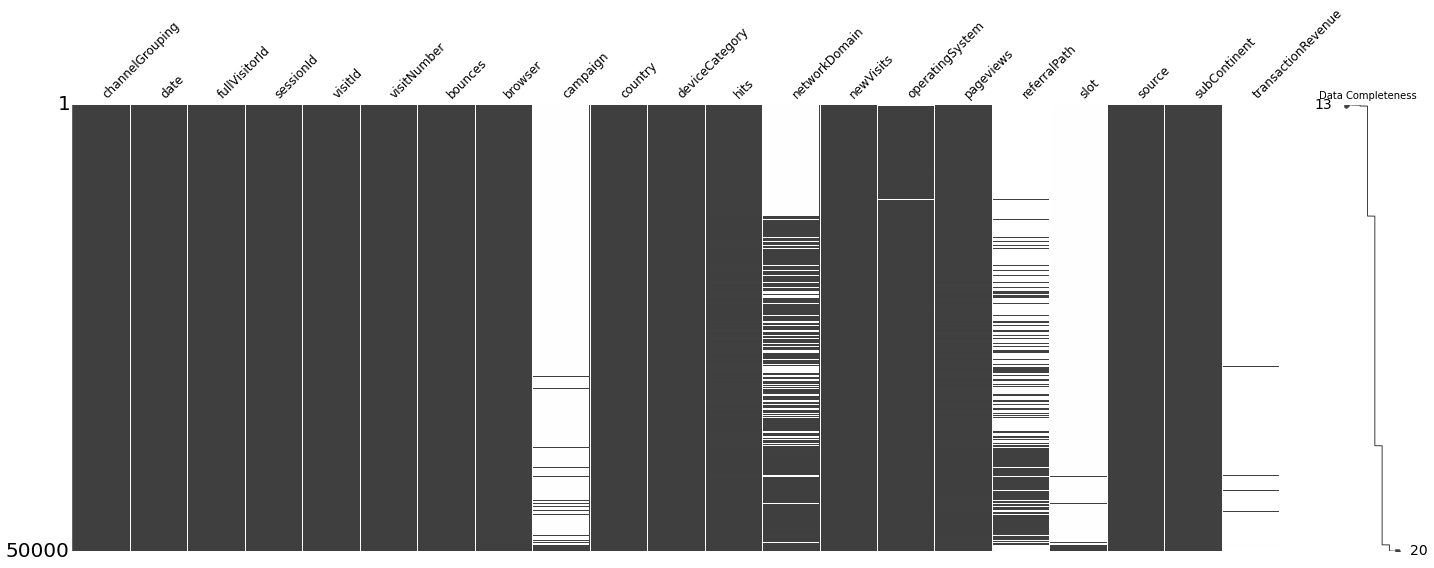

None

In [24]:
display(msno.matrix(train.sample(50000), inline=True, sparkline=True, figsize=(24,8), 
                    sort='ascending', labels=True, fontsize=12))
#display(msno.matrix(test.sample(1000), inline=True, sparkline=True, figsize=(24,8), 
                    #sort='ascending', labels=True, fontsize=12, color=(0.25, 0.45, 0.6)))

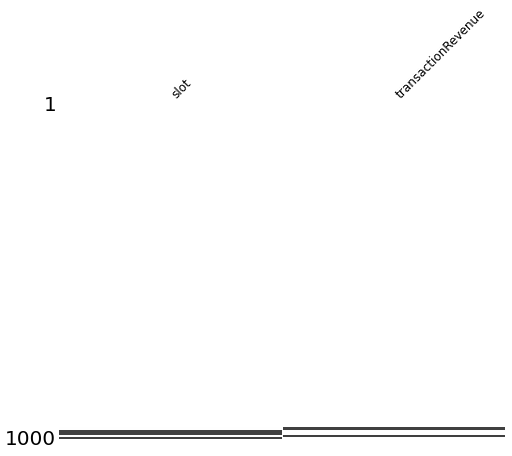

None

In [30]:
display(msno.matrix(train[['slot', 'transactionRevenue']].sample(1000, random_state=32), inline=True, sparkline=False, figsize=(8,6), 
                    sort='ascending', labels=True, fontsize=12))

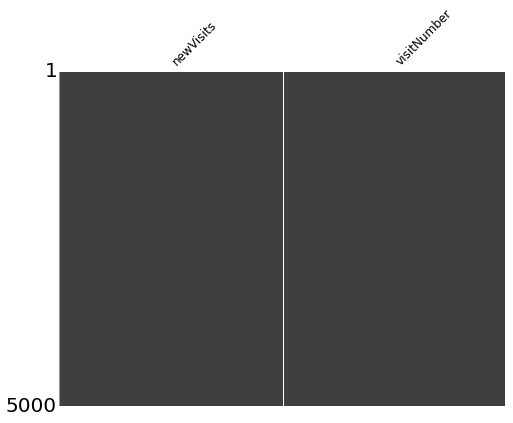

None

In [6]:
display(msno.matrix(train[['newVisits', 'visitNumber']].sample(5000, random_state=32), inline=True, sparkline=False, figsize=(8,6), 
                    sort='ascending', labels=True, fontsize=12))

/Users/p0d00cn/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


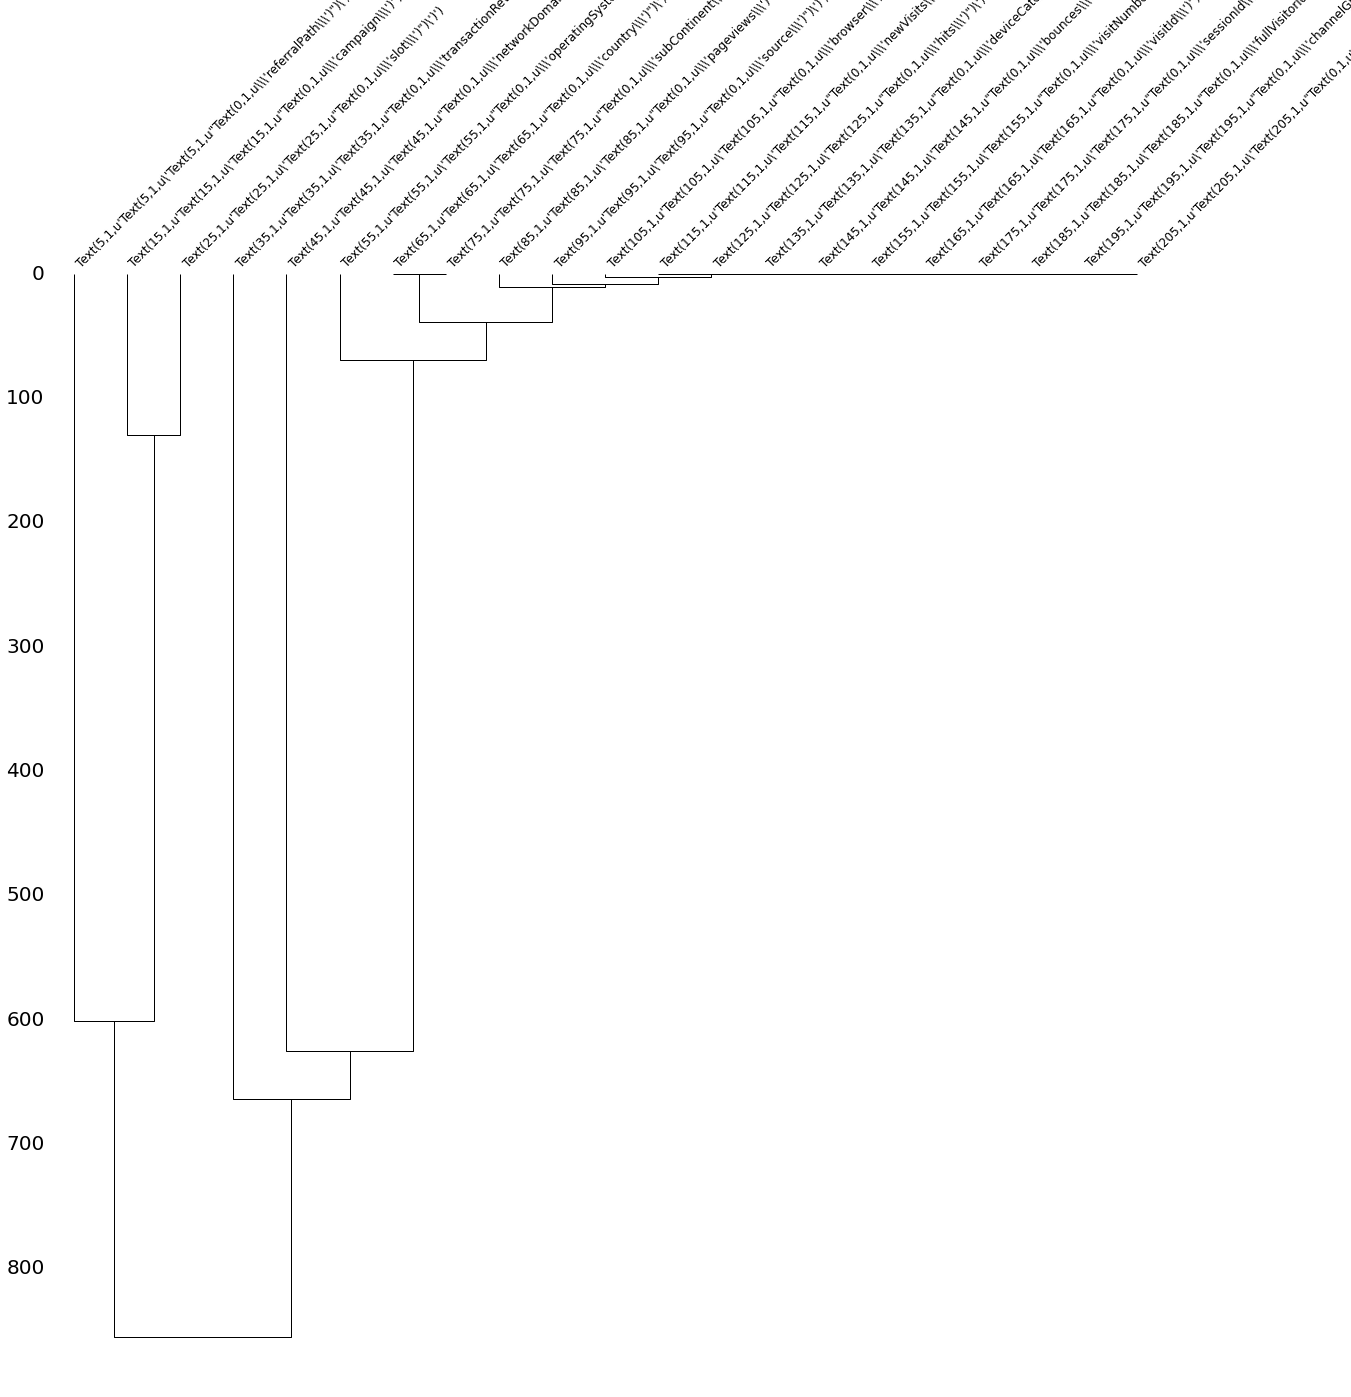

In [7]:
msno.dendrogram(train, inline=True, fontsize=12, figsize=(20,20))


In [8]:
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Seperating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
  

In [9]:
def feat_ext_source(df):
    medi_avg_mode = [f_ for f_ in df.columns if '_AVG' in f_ or '_MODE' in f_ or '_MEDI' in f_]
    df.drop(medi_avg_mode, axis=1, inplace=True)
    return df

In [ ]:
application_train = feat_ext_source(application_train)
application_test  = feat_ext_source(application_test)

In [ ]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
     

In [ ]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  

In [ ]:
# Function to make predictions 
def prediction(X_test, clf_object): 
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
  

In [ ]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  

In [ ]:
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 